# Exp 1: Basic Operations and Algebraic Operators for Digital Images #
## 1.	Aims ##

#### 1. Establish a Python environment and install some digital image processing libraries such as scikit-image, OpenCV, PIL, and matplotlib.

#### 2. Learn how to load, display, and save images.
    
#### 3. Be familiar with some basic image processing operations such as adding noise, image type conversion, image file format conversion, etc.

#### 4. Learn how to perform algebraic operations on digital images.

## 2.	Steps and Requirements

### (1) Load, Save and Display Images.	
(a) Load a PNG image (<font style="color:red;">'images/bunny.png'</font>) with Scikit-Image. (<font style="color:blue;">Tips: ``io.imread``</font>) 

(b) Convert it to PIL image format. (<font style="color:blue;">Tips: ``Image.fromarray``</font>) 

(c) Display this image with Matplotlib. (<font style="color:blue;">Tips: ``pyplot.imshow``</font>) 

(d) Convert PIL image format to OpenCV image format, save it as a JPEG image with the quality factor of 90. (<font style="color:blue;">Tips: ``cv2.imwrite``</font>)

(e) Load the JPEG image saved above, and save it as a BMP format and a TIFF format image, respectively.

(362, 580, 4)


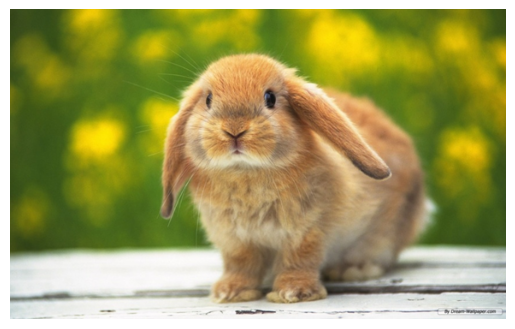

True

In [18]:
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# (a) Load a PNG image
bunny = io.imread(r"H:\大二下\数图\Exp1\images\bunny.png")
print(bunny.shape)

# (b)  Convert it to PIL image format
bunny = Image.fromarray(bunny)

# (c) Display this image
plt.imshow(bunny)
plt.axis('off')
plt.show()

# (d) Convert image format
bunny = np.array(bunny)
bunny = cv2.cvtColor(bunny, cv2.COLOR_RGB2BGR)# Converting an image from RGB color space to BGR color space.
cv2.imwrite(r'E:\Homework\DIP\result\bunny.jpg', bunny, [cv2.IMWRITE_JPEG_QUALITY, 90])

# (e) Load the BMP format
cv2.imwrite(r'E:\Homework\DIP\result\bunny.bmp',bunny)

# (e) Load the TIFF format
cv2.imwrite(r'E:\Homework\DIP\result\bunny.tiff',bunny)

### (2)	Display Three Individual Color Components of RGB Images. 
(a) Load an image with OpenCV. 

(b) Display the R, G, and B color component of the image, respectively. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure. 

(c) Answer the question: What are the differences between the RGB image and the R/G/B components?

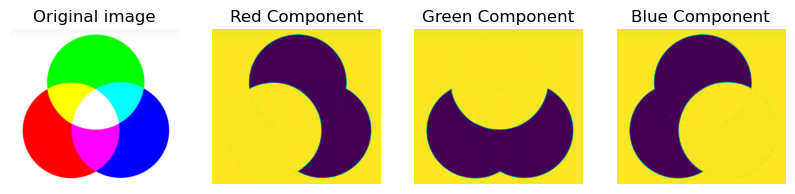

In [2]:
# (a) Load an image with OpenCV
image = cv2.imread(r"E:\Homework\DIP\image\three primary colours.jpg")
# Convert BGR to RGB
original_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# (b) Separate the R, G, and B color components of the image
R, G, B = cv2.split(original_image)

# Display them in the same figure with sub-figures
plt.figure(figsize=(10,4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original image')
plt.axis('off')

# Red Component image
plt.subplot(1, 4, 2)
plt.imshow(R)
plt.title('Red Component')
plt.axis('off')

# Green Component image
plt.subplot(1, 4, 3)
plt.imshow(G)
plt.title('Green Component')
plt.axis('off')

# Blue Component image
plt.subplot(1, 4, 4)
plt.imshow(B)
plt.title('Blue Component')
plt.axis('off')

plt.show()

# Answer question
# RGB image is consist of red channel, blue channel and green channel. It's just what we see every day.
# RGB image contains more color visually due to colour mixing . By contract, R/G/B components emphasize its corresponding channel color.

### (3)	Convert Color Image to Grayscale. 

(a) Display the original Lena image and the grayscale images obtained by three grayscaling methods in the same figure. Add the corresponding title. 1)Maximum of the three components; 2) The average of the three components; 3) gray=0.30*r + 0.59*g + 0.11*b.

(b) Answer the question: What are their differences?

(-0.5, 219.5, 219.5, -0.5)

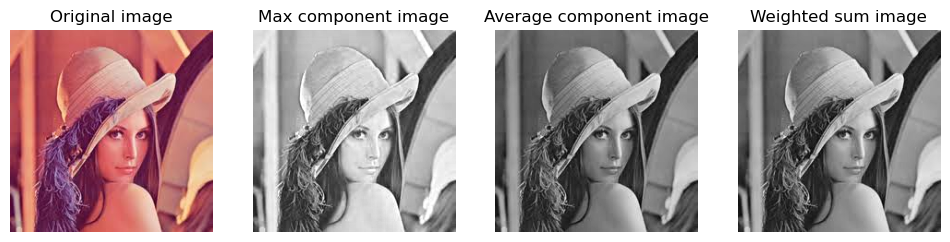

In [4]:
# Load the image
image = cv2.imread(r"E:\Homework\DIP\image\lena.jpg")
img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Separate the R, G, and B color components of the image
R, G, B = cv2.split(img)

# 1) Maximum of the three components
gray_max_image = np.maximum(np.maximum(R, G), B)

# 2) The average of the three components
gray_avg_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3) Weighted grey value gray=0.30r + 0.59g + 0.11*b
gray_weighted_image = (0.30 * R + 0.59 * G + 0.11 * B).astype(np.uint8)


# Display
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')
plt.axis('off')

# Max component image
plt.subplot(1, 4, 2)
plt.imshow(gray_max_image, cmap = 'gray')
plt.title('Max component image')
plt.axis('off')

# Average component image
plt.subplot(1, 4, 3)
plt.imshow(gray_avg_image, cmap = 'gray')
plt.title('Average component image')
plt.axis('off')

# Weighted sum image
plt.subplot(1, 4, 4)
plt.imshow(gray_weighted_image, cmap = 'gray')
plt.title('Weighted sum image')
plt.axis('off')

# The question
# 1) The resulting greyscale image tends to be brighter in terms of brightness because it tends to select the brightest parts of the colour channels. 
# This can result in some detail in the image being lost in the brighter areas, especially if there is a large difference in the colour components in the original image.
# 2) The generated greyscale image is moderate in brightness and retains the visual information of the original image better. Since all colour channels are given the same weight, the differences in the sensitivity of the human eye to different colours may be ignored to some extent, and the details of certain colours are not prominent enough.
# 3) The resulting greyscale image is visually more balanced and natural, and better reflects the human eye's true perception of different colours.



### (4)	Image Cropping. 

(a) Load an RGB image ('images/lena.jpg'). 

(b) Select the 128x128 central region of the image. 

(c) Display the full image and its central part. 

(d) Save the central part as an image file in the same format as the full-size image.

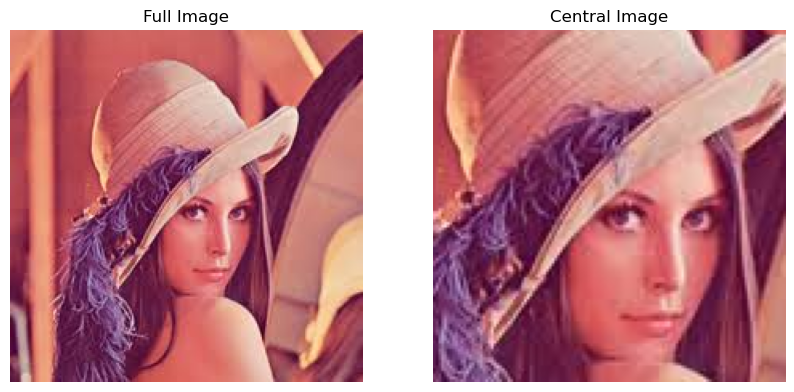

True

In [11]:
# (a) Load an RGB image
image = cv2.imread(r"E:\Homework\DIP\image\lena.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the image size
height, width, _ = image.shape 

# The wanted image size
size_height = 128
size_width = 128

# Select the starting point
x_center = width // 2
y_center = height // 2
x_start = x_center - size_height // 2
y_start = y_center - size_width // 2

# (b) Select the 128x128 central region of the image.
central_image = image[y_start:y_start + size_height, x_start:x_start + size_width]

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Full Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Central Image")
plt.imshow(central_image)
plt.axis('off')

plt.show()

# (d) Save the image
cv2.imwrite(r"E:\Homework\DIP\result\central_image.jpg", cv2.cvtColor(central_image, cv2.COLOR_RGB2BGR))

### (5)	Adding Noise to Image. 

(a) Load an RGB image with Scikit-Image ('images/lena.jpg').

(b) Add 1) Gaussian noise, 2) salt noise, 3) pepper noise, 4) salt&pepper noise, and 5) speckle noise to it. The parameters can be chosen by yourself. (<font style="color:blue;">Tips: You may use ``random_noise`` in the ``util`` module of Scikit-Image</font>)

(c) Display these six images (including the original noiseless image) in the same figure and add the corresponding title.

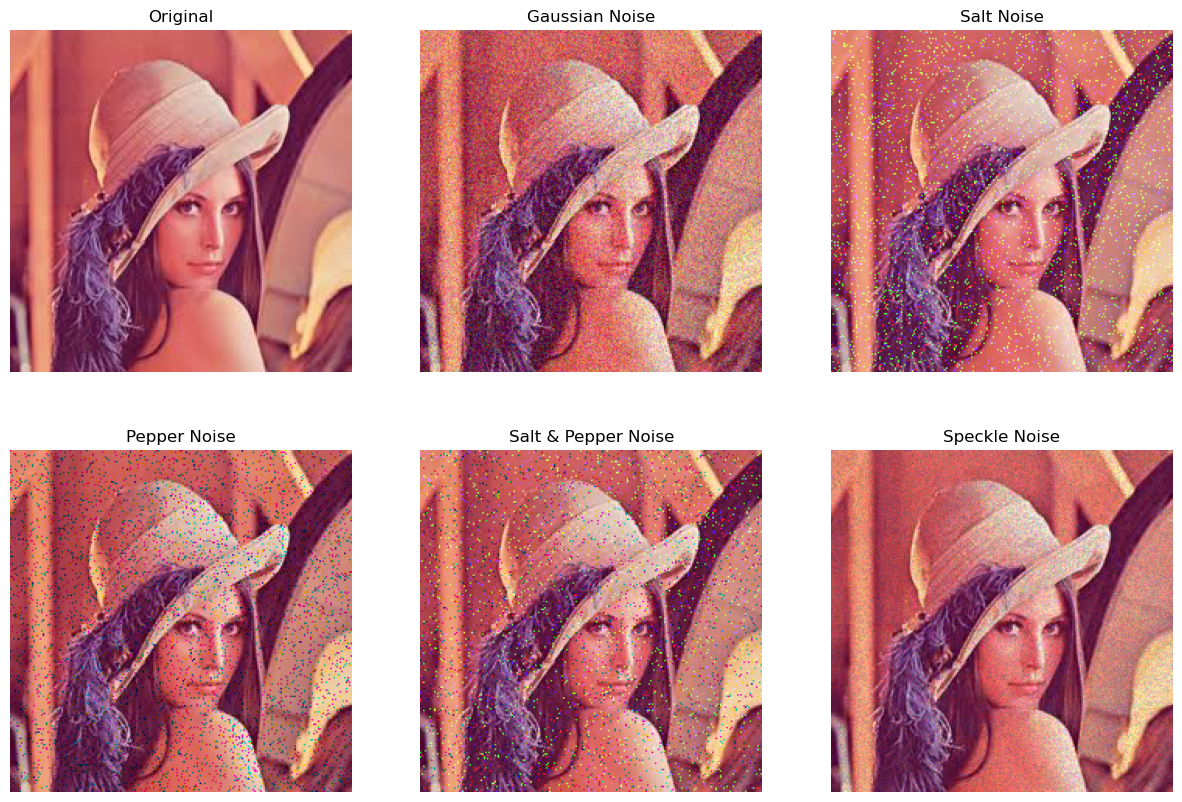

In [2]:
from skimage import util

# (a) Load an RGB image
image = io.imread("E:\Homework\DIP\image\lena.jpg")

# (b) Add different types of noise to the image
gaussian_noise = util.random_noise(image, mode='gaussian')
salt_noise = util.random_noise(image, mode='salt')
pepper_noise = util.random_noise(image, mode='pepper')
salt_pepper_noise = util.random_noise(image, mode='s&p')
speckle_noise = util.random_noise(image, mode='speckle')

# (c) Display all the images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

# Gaussian Noise
plt.subplot(2, 3, 2)
plt.imshow(gaussian_noise)
plt.title("Gaussian Noise")
plt.axis('off')

# Salt Noise
plt.subplot(2, 3, 3)
plt.imshow(salt_noise)
plt.title("Salt Noise")
plt.axis('off')

# Pepper Noise
plt.subplot(2, 3, 4)
plt.imshow(pepper_noise)
plt.title("Pepper Noise")
plt.axis('off')

# Salt & Pepper Noise
plt.subplot(2, 3, 5)
plt.imshow(salt_pepper_noise)
plt.title("Salt & Pepper Noise")
plt.axis('off')

# Speckle Noise
plt.subplot(2, 3, 6)
plt.imshow(speckle_noise)
plt.title("Speckle Noise")
plt.axis('off')

plt.show()

### (6)	Image Denoising by Averaging. 

(a) Load an RGB image. 

(b) Add Gaussian noise with a mean value of 0 and a variance of 0.1 to it. 

(c) Display and compare the images before and after adding noise. 

(d) Use the ``for`` loop to add 3, 30, and 300 images with random Gaussian noise and find their average value, respectively. 

(e) Display these averaged images in the same figure. Add corresponding titles, and compare the results.

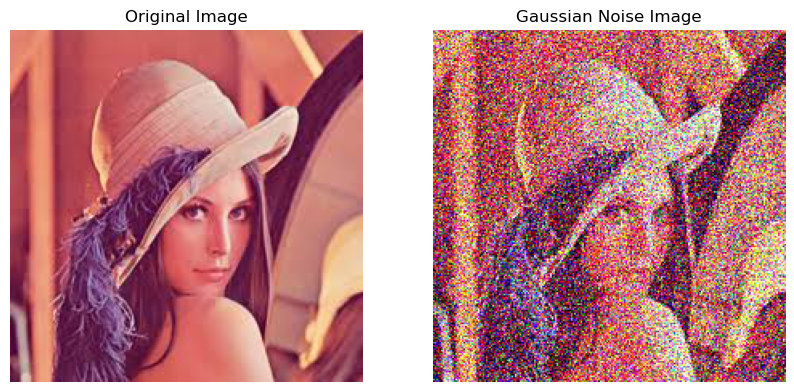

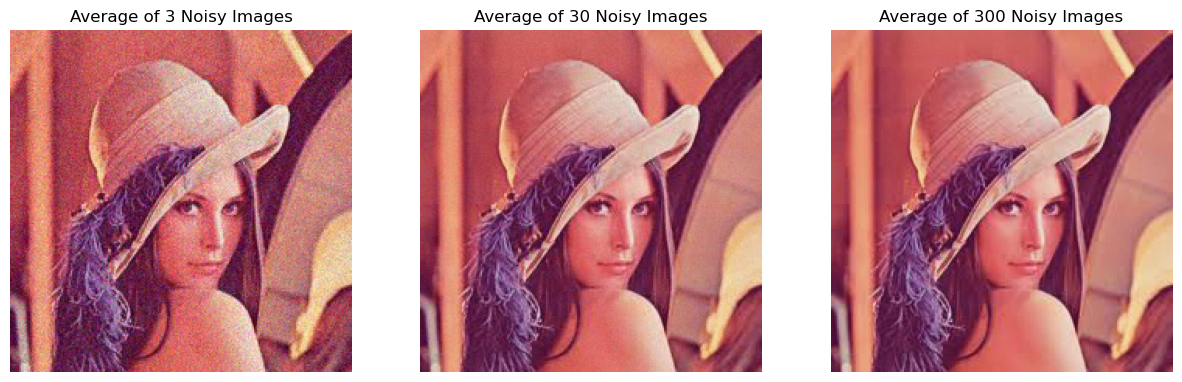

In [9]:
# (a) Load an RGB image
image = io.imread("E:\Homework\DIP\image\lena.jpg")
image = np.array(image)

# (b) Add Gaussian noise
gaussian_image = util.random_noise(image, mode = 'gaussian', mean = 0, var = 0.1, clip = True )

# Display the image
plt.figure(figsize=(10, 5))

# Display the 'before' image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the 'after' image
plt.subplot(1, 2, 2)
plt.imshow(gaussian_image)
plt.title('Gaussian Noise Image')
plt.axis('off')

plt.show()

# Function to add noise and average images
def average_noisy_image(image, num_images):
    gaussian_noise = np.zeros(image.shape, dtype = np.float64)
    for _ in range(num_images):
        gaussian_noise += util.random_noise(image, mode = 'gaussian')
    gaussian_noise = gaussian_noise * 255
    gaussian_noise = (gaussian_noise / num_images).astype(np.uint8)
    return gaussian_noise
    
noise_gaussian_image_3 = average_noisy_image(image, 3)
noise_gaussian_image_30 = average_noisy_image(image, 30)
noise_gaussian_image_300 = average_noisy_image(image, 300)

# Display the image
plt.figure(figsize=(15, 10))

# Average of 3 Noisy Images
plt.subplot(1, 3, 1)
plt.imshow(noise_gaussian_image_3)
plt.title('Average of 3 Noisy Images')
plt.axis('off')

# Average of 30 Noisy Images
plt.subplot(1, 3, 2)
plt.imshow(noise_gaussian_image_30)
plt.title('Average of 30 Noisy Images')
plt.axis('off')

# Average of 300 Noisy Images
plt.subplot(1, 3, 3)
plt.imshow(noise_gaussian_image_300)
plt.title('Average of 300 Noisy Images')
plt.axis('off')
plt.show()

# Image averaging can reduce noise 

### (7)	Image Algebraic Operations. 

(a) Download two pictures by yourself, and load these two pictures with OpenCV. 

(b) Perform algebraic operations of addition and subtraction (<font style="color:blue;">Tips : Pay attention to the size and type of the image during the calculation. If they are different, the larger image should be cropped or scaled</font>).

(c) Display the images before and after processing.

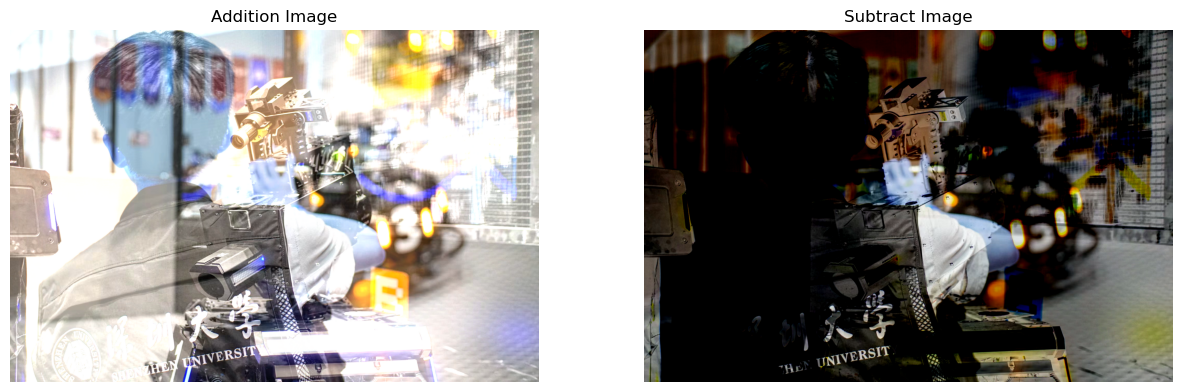

In [12]:
# (a) Load two pictures 
image_1 = cv2.imread(r"E:\Homework\DIP\image\9713ccc42d067a56773324c4d30fc7d.jpg")
image_2 = cv2.imread(r"E:\Homework\DIP\image\55337effbd9e1345646ea755da390f5.jpg")

# (b) Algebraic operations of addition
add_image = cv2.add(src1 = image_1, src2 = image_2)

# (b) Algebraic operations of subtraction
sub_image = cv2.subtract(src1 = image_1, src2 = image_2)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(add_image)
plt.title('Addition Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sub_image)
plt.title('Subtract Image')
plt.axis('off')

plt.show()

### (8)	Text adding. 

(a) Load the Lena image with OpenCV. 

(b) Employ a red rectangle to mark the 64x64 rectangle in the middle of image. (<font style="color:blue;">Tips: You may use ``cv2.rectangle``</font>) 

(c) Adding some black text on it. (<font style="color:blue;">Tips: You may use``cv2.putText``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_8.png) 
<center><font style="color:red;">** Figure 1. The result of adding content to Lean image** </font></center>

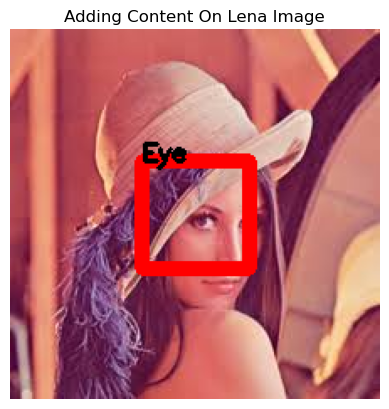

In [32]:
# (a) Load the Lena image
image = cv2.imread(r"E:\Homework\DIP\image\lena.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# The wanted image size
size_height = 64
size_width = 64

# Get image size
height, width, _ = image.shape

x_center = width // 2
y_center = height // 2
x_start = x_center - size_height // 2
y_start = y_center - size_width // 2
# (b) Employ a red rectangle 
cv2.rectangle(image, (x_start, y_start), (x_start + size_width, y_start + size_height), (255, 0, 0), 8)
# (c) Adding black text
cv2.putText(image, 'Eye', (x_start, y_start), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Display the image
plt.imshow(image)
plt.title('Adding Content On Lena Image')
plt.axis('off')
plt.show()

### (9)	Adding image mask. 

(a) Load the Lena image with OpenCV. 

(b) Adding a circular mask on the Lena image. (<font style="color:blue;">Tips: You may use``numpy.ogrid``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_9.png) 
<center><font style="color:red;">** Figure 2. The result of adding binary mask to Lean image** </font></center>

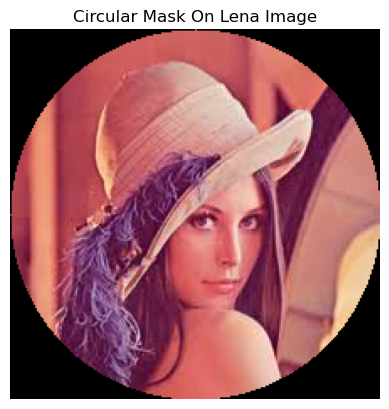

In [31]:
# (a) Load the Lena image
image = cv2.imread(r"E:\Homework\DIP\image\lena.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# (b) Adding a circular mask on the Lena image
height, width, _ = image.shape
x, y = np.ogrid[0:height, 0:width]
mask = (x - height / 2) ** 2 + (y - width / 2) **2 > height * width / 4
image[mask, :] = 0

# Display the image
plt.imshow(image)
plt.title('Circular Mask On Lena Image')
plt.axis('off')
plt.show()

### (10)	Capture Images by Laptop Camera with OpenCV. (``Bonus Task``)

(a) Read the video stream from the laptop camera.(For more details check [this](http://www.1zlab.com/wiki/python-opencv-tutorial/opencv-read-usb-camera-image/)) 

(b) Implement Time-lapse photography.(It can be used to record the whole process of the evaporation of water droplets in the cup. <font style="color:blue;"> Tips: You may use``time.sleep``</font>)

(c) Generate corresponding MP4 video or GIF image.

In [34]:
import cv2
import time
import imageio

def capture_timelapse(interval, duration, output_video, output_gif):
    """
    Capture time-lapse images from the webcam and save as video and GIF.

    :param interval: Time in seconds between frames.
    :param duration: Total duration of the timelapse in seconds.
    :param output_video: Filename for the output video.
    :param output_gif: Filename for the output GIF.
    """
    cap = cv2.VideoCapture(0)  # Initialize the camera

    if not cap.isOpened():
        print("Could not open camera.")
        return

    frames = []
    start_time = time.time()

    while True:
        ret, frame = cap.read()  # Capture frame-by-frame

        if not ret:
            print("Can't receive frame")
            break

        frames.append(frame)  # Store the frame for later processing
        time.sleep(interval)  # Wait for the specified interval

        # Show the frame
        cv2.imshow('Timelapse Frame', frame)

        if cv2.waitKey(1) == ord('q') or (time.time() - start_time) > duration:
            break

    cap.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows

    # Save the frames to a video file
    height, width, layers = frames[0].shape
    video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), 1.0 / interval, (width, height))

    for frame in frames:
        video.write(frame)

    video.release()

    # Save the frames to a GIF file
    imageio.mimsave(output_gif, frames, 'GIF', duration=interval)

# Parameters
interval = 2  # seconds
duration = 20  # seconds
output_video = 'timelapse.mp4'
output_gif = 'timelapse.gif'

capture_timelapse(interval, duration, output_video, output_gif)


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Submit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.